In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import hamiltonian as hm
import glob

In [2]:
L = 11
dense = True
if (dense): 
    fix = 'dense'
    prefix = 'data/otoc_dense'
else: 
    fix = 'sparse'
    prefix = 'data/otoc_sparse'
sites = np.arange(L)
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [3]:
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(int(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname)[::-1])
    vsback.append(int(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

5 [-0.06611555 -0.23883326]
6 [-0.0150703  -0.60210267]
7 [ 0.03782903 -1.10152649]
8 [ 0.03740097 -1.41901336]
9 [ 0.00456858 -1.6107431 ]
10 [-0.04429726 -1.73124382]
11 [-0.10044502 -1.81063429]
12 [-0.15933818 -1.86514263]
14 [-0.27700968 -1.93203161]
16 [-0.38897114 -1.96885134]
18 [-0.49322757 -1.990349  ]
20 [-0.58974375 -2.00334267]
22 [-0.67909238 -2.01132656]
24 [-0.76199532 -2.01622795]


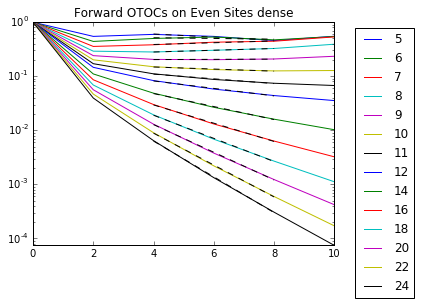

In [4]:
ax = plt.subplot(111)
gammas_fore_even = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[::2], otocfore[::2], label = str(vs[idx]))
    x = sites[4:10:2]
    y = otocfore[4:10:2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_even.append(coeffs[0])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Even Sites " + fix)
plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

5 [-0.05990859 -0.43320534]
6 [ 0.06670934 -1.19724243]
7 [ 0.12996424 -1.8100224 ]
8 [ 0.13533419 -2.23447456]
9 [ 0.10767457 -2.53438667]
10 [ 0.06288659 -2.75652678]
11 [ 0.00999084 -2.92994938]
12 [-0.04619115 -3.07149999]
14 [-0.15944439 -3.29463091]
16 [-0.26786487 -3.46819272]
18 [-0.36920105 -3.61088284]
20 [-0.4632747  -3.73247552]
22 [-0.55055887 -3.83871108]
24 [-0.63170045 -3.93324527]


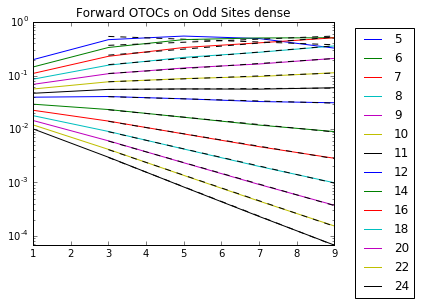

In [5]:
ax = plt.subplot(111)
gammas_fore_odd = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[1::2], otocfore[1::2], label = str(vs[idx]))
    x = sites[3::2]
    y = otocfore[3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_odd.append(coeffs[0])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Odd Sites " + fix)
plt.savefig('figures/otocs_' + fix + 'foreoddL' + str(L) + '.pdf')
plt.show()

5 [-0.01687741 -0.69842283]
6 [ 0.01153247 -1.06515651]
7 [-0.00165293 -1.29954712]
8 [-0.0428996  -1.43319607]
9 [-0.09739867 -1.5141715 ]
10 [-0.15690449 -1.56882851]
11 [-0.21738862 -1.60966061]
12 [-0.27697698 -1.64247029]
14 [-0.39063744 -1.69380092]
16 [-0.49578698 -1.73293363]
18 [-0.59270817 -1.76377748]
20 [-0.68219862 -1.78855174]
22 [-0.76510633 -1.80875303]
24 [-0.84220852 -1.82544971]


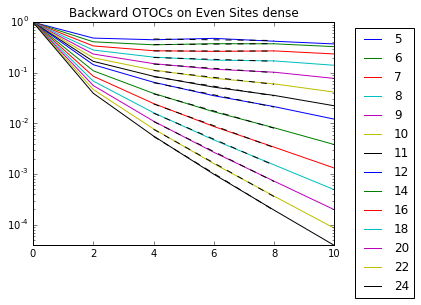

In [6]:
ax = plt.subplot(111)
gammas_back_even = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[::2], otocback[::2], label = str(vs[idx]))
    x = sites[4:10:2]
    y = otocback[4:10:2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_even.append(coeffs[0])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs on Even Sites " + fix)
plt.savefig('figures/otocs_' + fix + 'backevenL' + str(L) + '.pdf')
plt.show()

5 [ 0.01314614 -0.82367259]
6 [ 0.04400248 -1.22911401]
7 [ 0.05142095 -1.61712566]
8 [ 0.0363415 -1.9489564]
9 [ 0.00427591 -2.21930654]
10 [-0.03834441 -2.43949676]
11 [-0.0866453  -2.62234942]
12 [-0.13754376 -2.77757512]
14 [-0.24056979 -3.03011365]
16 [-0.34022602 -3.23038997]
18 [-0.43428561 -3.39589585]
20 [-0.52231341 -3.53676683]
22 [-0.60452897 -3.65934523]
24 [-0.68137511 -3.7678382 ]


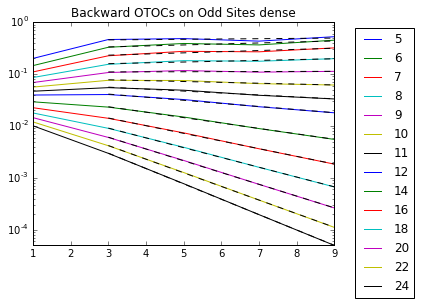

In [7]:
ax = plt.subplot(111)
gammas_back_odd = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[1::2], otocback[1::2], label = str(vs[idx]))
    x = sites[3::2]
    y = otocback[3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_odd.append(coeffs[0])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs on Odd Sites " + fix)
plt.savefig('figures/otocs_' + fix + 'backoddL' + str(L) + '.pdf')
plt.show()

Forward Odd:   v_butterfly=11.0015718222
Backward Odd:  v_butterfly= 9.00346264844
Forward Even:  v_butterfly= 8.87635449384
Backward Even: v_butterfly= 6.36340222273


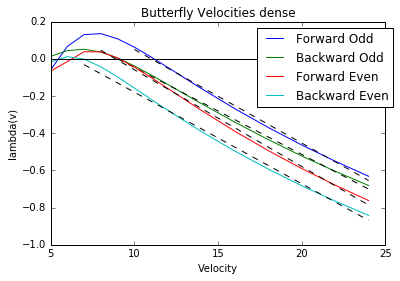

In [8]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore_odd,  label = "Forward Odd")
coeffs = np.polyfit(vs[5:], gammas_fore_odd[5:], deg=1)
ax.plot(vs[5:], coeffs[0]*vs[5:] + coeffs[1], 'k--')
print("Forward Odd:   v_butterfly=" + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_back_odd,  label = "Backward Odd")
coeffs = np.polyfit(vs[4:], gammas_back_odd[4:], deg=1)
ax.plot(vs[4:], coeffs[0]*vs[4:] + coeffs[1], 'k--')
print("Backward Odd:  v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_fore_even, label = "Forward Even")
coeffs = np.polyfit(vs[3:], gammas_fore_even[3:], deg=1)
ax.plot(vs[3:], coeffs[0]*vs[3:] + coeffs[1], 'k--')
print("Forward Even:  v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_back_even, label = "Backward Even")
coeffs = np.polyfit(vs[5:], gammas_back_even[5:], deg=1)
ax.plot(vs[2:], coeffs[0]*vs[2:] + coeffs[1], 'k--')
print("Backward Even: v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [9]:
print(forenames)

['data/otoc_denseforeL11v12.npy', 'data/otoc_denseforeL11v11.npy', 'data/otoc_denseforeL11v10.npy', 'data/otoc_denseforeL11v14.npy', 'data/otoc_denseforeL11v16.npy', 'data/otoc_denseforeL11v9.npy', 'data/otoc_denseforeL11v8.npy', 'data/otoc_denseforeL11v5.npy', 'data/otoc_denseforeL11v6.npy', 'data/otoc_denseforeL11v7.npy', 'data/otoc_denseforeL11v18.npy', 'data/otoc_denseforeL11v24.npy', 'data/otoc_denseforeL11v20.npy', 'data/otoc_denseforeL11v22.npy']


In [10]:
print(backnames)

['data/otoc_densebackL11v20.npy', 'data/otoc_densebackL11v22.npy', 'data/otoc_densebackL11v8.npy', 'data/otoc_densebackL11v9.npy', 'data/otoc_densebackL11v18.npy', 'data/otoc_densebackL11v24.npy', 'data/otoc_densebackL11v7.npy', 'data/otoc_densebackL11v14.npy', 'data/otoc_densebackL11v6.npy', 'data/otoc_densebackL11v16.npy', 'data/otoc_densebackL11v5.npy', 'data/otoc_densebackL11v12.npy', 'data/otoc_densebackL11v11.npy', 'data/otoc_densebackL11v10.npy']


In [11]:
vs

array([ 5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 18, 20, 22, 24])

##### type(np.poly1d(coeffs))

In [12]:
vs

array([ 5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 18, 20, 22, 24])